In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [37]:
def read_intensity_data(file_path):
    """Read intensity data from a text file with time in the first column and intensity in the second."""
    time_data = []
    intensity_data = []
    first_line = True
    with open(file_path, 'r') as file:
        for line in file:
            if first_line:
                first_line = False
                continue  # Skip the first line
            # Split each line by whitespace
            parts = line.strip().split()
            # Skip empty lines
            if len(parts) == 0:
                continue
            # Parse time and intensity
            time_data.append(float(parts[0]))
            intensity_data.append(float(parts[1]))
    return np.array(time_data), np.array(intensity_data)

def plot_intensity_vs_time(time_data, intensity_data):
    """Plot intensity data against time."""
    plt.figure(figsize=(16, 8))  
    plt.plot(time_data, intensity_data, label='Intensity', color='r')
    plt.title('Intensity vs. Time')
    plt.xlabel('Time')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

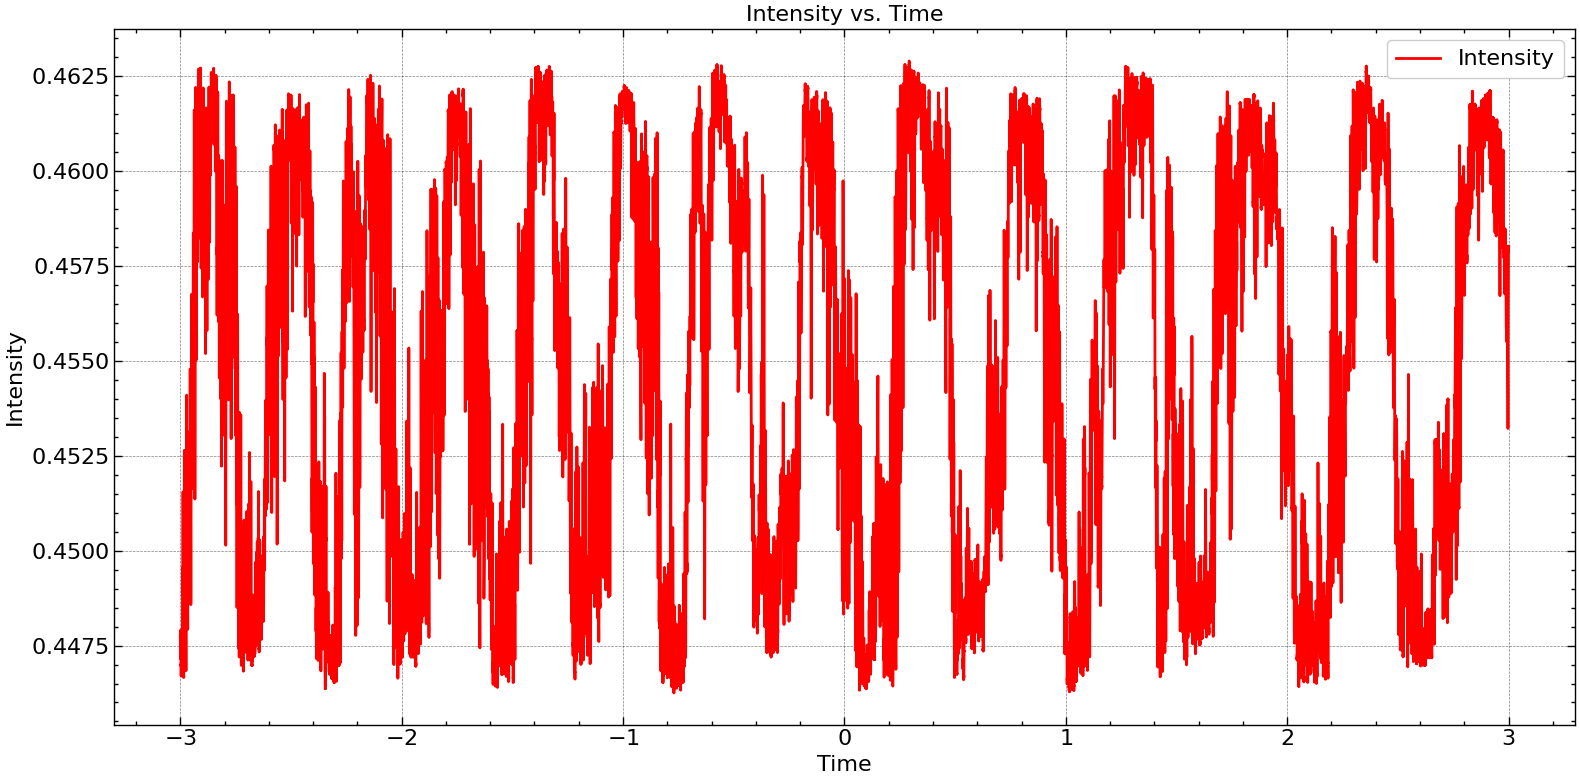

In [42]:
file_path = 'waveform_data_txt/NEGRES35.txt'  
time_data, intensity_data = read_intensity_data(file_path)
plot_intensity_vs_time(time_data, intensity_data)

In [43]:
def perform_fft_analysis(x, y):
    """Perform FFT analysis on the given data."""
    # Calculate the average time step
    average_time_step = np.mean(np.diff(x))
    # Calculate the sampling rate
    sampling_rate = 1 / average_time_step
    # Calculate the FFT
    fft_values = np.fft.fft(y)
    # Calculate the frequencies
    frequencies = np.fft.fftfreq(len(y), d=average_time_step)
    # Find the dominant frequency
    dominant_frequency = np.abs(frequencies[np.argmax(np.abs(fft_values))])
    
    return frequencies, fft_values, dominant_frequency

def plot_fft_results(frequencies, fft_values):
    """Plot the FFT results."""
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, np.abs(fft_values))
    plt.title('FFT Analysis')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    

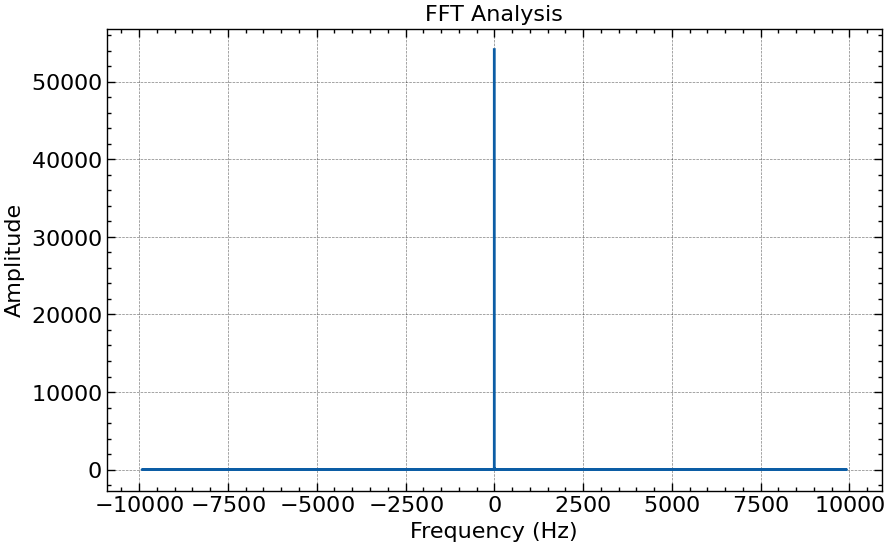

Dominant frequency: 0.0 Hz


In [45]:
frequencies, fft_values, dominant_frequency = perform_fft_analysis(time_data[1:], intensity_data[1:])
plot_fft_results(frequencies, fft_values)

print("Dominant frequency:", dominant_frequency, "Hz")